
Actividad Guiada 3 de Algoritmos de Optimización

Nombre: José Pablo Cifuentes Sánchez

https://colab.research.google.com/drive/1EIcsarqY9-Z29Y-_RLBxeI_Ov6vTeWYr?usp=sharing

https://github.com/jpcifuentes16/03MIAR---Algoritmos-de-Optimizacion--2022.git


In [ ]:
!pip install requests    #Hacer llamadas http a paginas de la red
!pip install tsplib95    #Modulo para las instancias del problema del TSP

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.6 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0


In [ ]:
import urllib.request #Hacer llamadas http a paginas de la red
import tsplib95       #Modulo para las instancias del problema del TSP
import math           #Modulo de funciones matematicas. Se usa para exp
import random         #Para generar valores aleatorios

# Agente Viajero

In [ ]:
#Descargamos el fichero de datos(Matriz de distancias)
file = "swiss42.tsp" ; 
urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/swiss42.tsp.gz", file + '.gz')
!gzip -d swiss42.tsp.gz     #Descomprimir el fichero de datos 

In [ ]:
#Carga de datos y generación de objeto problem
###############################################################################
problem = tsplib95.load(file)

#Nodos
Nodos = list(problem.get_nodes())

#Aristas
Aristas = list(problem.get_edges())


## Funciones Básicas

In [ ]:
 
#Funcionas basicas
###############################################################################      
     
#Se genera una solucion aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos): 
  solucion = [Nodos[0]]
  for n in Nodos[1:]:
    solucion = solucion + [random.choice(list(set(Nodos) - set({Nodos[0]}) - set(solucion)))]
  return solucion 

#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.get_weight(a,b)

#Devuelve la distancia total de una trayectoria/solucion
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)


 

## Búsqueda Aleatoria

In [ ]:
###############################################################################
# BUSQUEDA ALEATORIA
###############################################################################

def busqueda_aleatoria(problem, N):
  #N es el numero de iteraciones
  Nodos = list(problem.get_nodes())
  
  mejor_solucion = []
  #mejor_distancia = 10e100                         #Inicializamos con un valor alto
  mejor_distancia = float('inf')                    #Inicializamos con un valor alto
  
  for i in range(N):                                #Criterio de parada: repetir N veces pero podemos incluir otros
    solucion = crear_solucion(Nodos)                #Genera una solucion aleatoria
    distancia = distancia_total(solucion, problem)  #Calcula el valor objetivo(distancia total)
    
    if distancia < mejor_distancia:                 #Compara con la mejor obtenida hasta ahora
      mejor_solucion = solucion
      mejor_distancia = distancia
      
      
  print("Mejor solución:" , mejor_solucion) 
  print("Distancia     :" , mejor_distancia) 
  return mejor_solucion  

    
#Busqueda aleatoria con 5000 iteraciones    
solucion = busqueda_aleatoria(problem, 10000)    

Mejor solución: [0, 21, 4, 28, 11, 18, 16, 17, 31, 7, 6, 30, 20, 22, 37, 25, 36, 35, 19, 14, 15, 33, 32, 12, 9, 38, 34, 24, 29, 39, 10, 2, 8, 40, 23, 41, 27, 1, 13, 5, 26, 3]
Distancia     : 3652


# Búsqueda Local - Generador de Vecindad

In [ ]:
###############################################################################
# BUSQUEDA LOCAL
###############################################################################
def genera_vecina(solucion):
  #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
  #Se puede modificar para aplicar otros generadores distintos que 2-opt
  #print(solucion)
  mejor_solucion = []
  mejor_distancia = 10e100
  for i in range(1,len(solucion)-1):          #Recorremos todos los nodos en bucle doble para evaluar todos los intercambios 2-opt
    for j in range(i+1, len(solucion)):
      
      #Se genera una nueva solución intercambiando los dos nodos i,j:
      #  (usamos el operador + que para listas en python las concatena) : ej.: [1,2] + [3] = [1,2,3]
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]   

      #Se evalua la nueva solución ...
      distancia_vecina = distancia_total(vecina, problem)         

      #... para guardarla si mejora las anteriores
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion


#solucion = [1, 47, 13, 41, 40, 19, 42, 44, 37, 5, 22, 28, 3, 2, 29, 21, 50, 34, 30, 9, 16, 11, 38, 49, 10, 39, 33, 45, 15, 24, 43, 26, 31, 36, 35, 20, 8, 7, 23, 48, 27, 12, 17, 4, 18, 25, 14, 6, 51, 46, 32]
print("Distancia Solucion Incial:" , distancia_total(solucion, problem))
 

nueva_solucion = genera_vecina(solucion)
print("Distancia Mejor Solucion Local:", distancia_total(nueva_solucion, problem))


Distancia Solucion Incial: 3652
Distancia Mejor Solucion Local: 3325


In [ ]:
#Busqueda Local:
#  - Sobre el operador de vecindad 2-opt(funcion genera_vecina)
#  - Sin criterio de parada, se para cuando no es posible mejorar.
def busqueda_local(problem):
  mejor_solucion = []
  
  #Generar una solucion inicial de referencia(aleatoria)
  solucion_referencia = crear_solucion(Nodos)
  mejor_distancia = distancia_total(solucion_referencia, problem)

  iteracion=0             #Un contador para saber las iteraciones que hacemos
  while(1):
    iteracion +=1         #Incrementamos el contador
    #print('#',iteracion)

    #Obtenemos la mejor vecina ...
    vecina = genera_vecina(solucion_referencia)

    #... y la evaluamos para ver si mejoramos respecto a lo encontrado hasta el momento
    distancia_vecina = distancia_total(vecina, problem)
 
    #Si no mejoramos hay que terminar. Hemos llegado a un minimo local(según nuestro operador de vencindad 2-opt)
    if distancia_vecina < mejor_distancia:
      #mejor_solucion = copy.deepcopy(vecina)   #Con copia profunda. Las copias en python son por referencia 
      mejor_solucion = vecina                   #Guarda la mejor solución encontrada
      mejor_distancia = distancia_vecina

    else:
      print("En la iteracion ", iteracion, ", la mejor solución encontrada es:" , mejor_solucion) 
      print("Distancia     :" , mejor_distancia) 
      return mejor_solucion
      
    solucion_referencia = vecina
 
 
sol = busqueda_local(problem )

En la iteracion  42 , la mejor solución encontrada es: [0, 34, 33, 20, 35, 36, 31, 17, 37, 15, 16, 5, 18, 11, 12, 3, 27, 2, 28, 32, 30, 38, 22, 39, 24, 40, 21, 9, 29, 4, 6, 26, 10, 8, 23, 41, 25, 13, 19, 14, 7, 1]
Distancia     : 1678


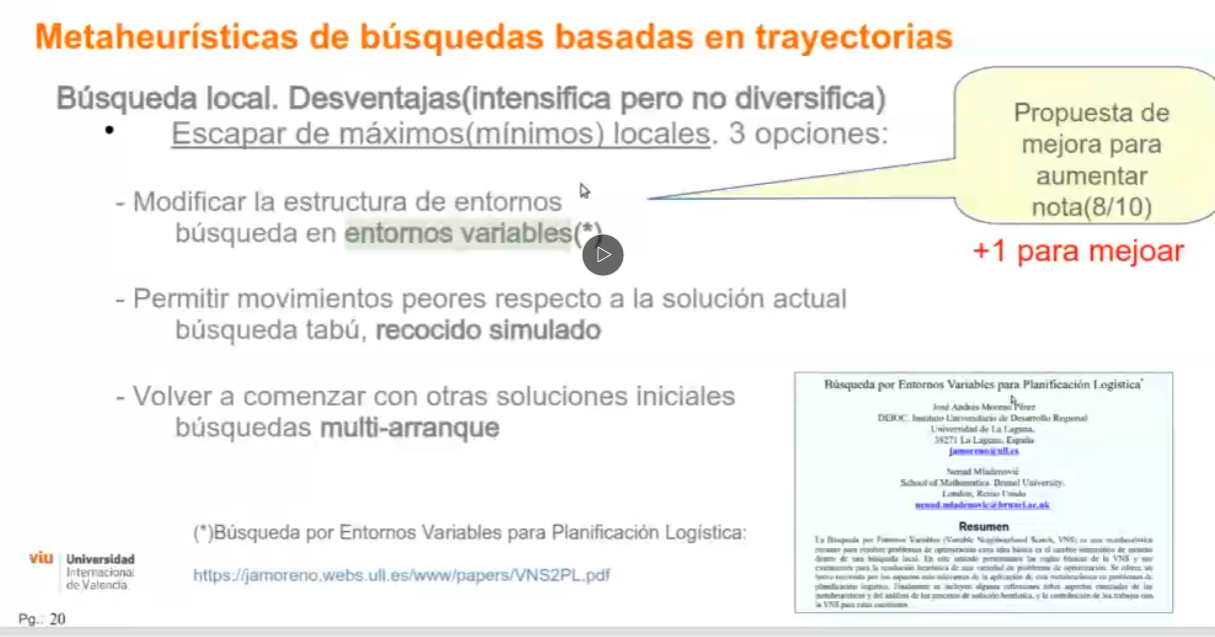

# Recocido Simulado

In [ ]:
###############################################################################
# SIMULATED ANNEALING
###############################################################################

#Generador de 1 solucion vecina 2-opt 100% aleatoria (intercambiar 2 nodos)
#Mejorable eligiendo otra forma de elegir una vecina.
def genera_vecina_aleatorio(solucion):

  #Se eligen dos nodos aleatoriamente
  i,j = sorted(random.sample( range(1,len(solucion)) , 2))
  
  #Devuelve una nueva solución pero intercambiando los dos nodos elegidos al azar
  return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]
  
 
#Funcion de probabilidad para aceptar peores soluciones
def probabilidad(T,d):
  if random.random() <  math.exp( -1*d / T)  :
    return True
  else:
    return False

#Funcion de descenso de temperatura
def bajar_temperatura(T):
  return T*0.99

In [ ]:
def recocido_simulado(problem, TEMPERATURA ):
  #problem = datos del problema
  #T = Temperatura
  
  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)
  
  mejor_solucion = []             #x* del seudocodigo
  mejor_distancia = 10e100        #F* del seudocodigo
  
  
  N=0
  while TEMPERATURA > .0001:
    N+=1
    #Genera una solución vecina
    vecina =genera_vecina_aleatorio(solucion_referencia)
    
    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)
      
    #Si es la mejor solución de todas se guarda(siempre!!!)
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina
    
    #Si la nueva vecina es mejor se cambia  
    #Si es peor se cambia según una probabilidad que depende de T y delta(distancia_referencia - distancia_vecina)
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      #solucion_referencia = copy.deepcopy(vecina)
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    #Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)
 
  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol  = recocido_simulado(problem, 10000000)

La mejor solución encontrada es [0, 26, 7, 32, 34, 33, 29, 23, 21, 24, 40, 41, 8, 9, 22, 39, 38, 28, 12, 11, 25, 10, 30, 20, 35, 36, 31, 17, 16, 14, 15, 37, 1, 5, 19, 13, 18, 6, 4, 2, 27, 3]
con una distancia total de 2002


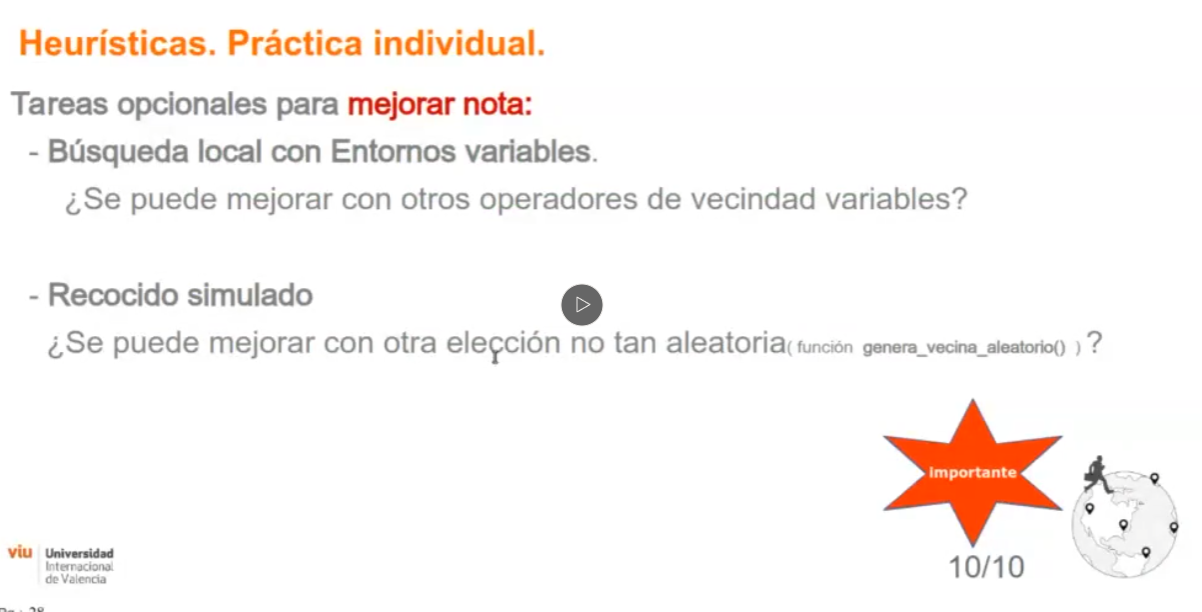